In [1]:
import tensorflow as tf
import keras
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

sess = tf.Session()
K.set_session(sess)

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

Using TensorFlow backend.


In [2]:
def CNN_model(ac='sigmoid'):
    
    cnn = Sequential()
    
    cnn.add(Conv2D(32, [5, 5], input_shape=(28, 28, 1), activation=ac, padding='same', name='Conv2d_5x5_1'))

    cnn.add(Conv2D(64, [3, 3], activation=ac, padding='same', name='Conv2d_3x3_1'))
    cnn.add(MaxPooling2D([3, 3], name='maxpool_1'))

    cnn.add(Conv2D(128, [3, 3], activation=ac, padding='same', name='Conv2d_3x3_2'))
    cnn.add(MaxPooling2D([2, 2], name='maxpool_2'))

    cnn.add(Conv2D(128, [3, 3], activation=ac, padding='valid', name='Conv2d_3x3_3'))

    cnn.add(Flatten())
    cnn.add(Dense(10, activation='softmax'))

    return cnn

# 比較激發函數的差異

In [3]:
activations = ['sigmoid', 'relu']
ac_logger = []
print("Activation compare:")
print("\tSigmoid vs ReLU\n")
for activation in activations:
    print("Activation Use", activation)
    model = CNN_model(ac=activation)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    callback = EarlyStopping(monitor='acc', min_delta=0.001, patience=5)
    ac_logger.append(model.fit(x_train, y_train, epochs=30, validation_split=0.1, callbacks=[callback]))
    eva = model.evaluate(x_test, y_test)
    print("Test accuracy: %.2f loss: %.2f" % (eva[1]*100, eva[0]))
    
    K.clear_session()

Activation compare:
	Sigmoid vs ReLU

Activation Use sigmoid
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2d_5x5_1 (Conv2D)        (None, 28, 28, 32)        832       
_________________________________________________________________
Conv2d_3x3_1 (Conv2D)        (None, 28, 28, 64)        18496     
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 9, 9, 64)          0         
_________________________________________________________________
Conv2d_3x3_2 (Conv2D)        (None, 9, 9, 128)         73856     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 4, 4, 128)         0         
_________________________________________________________________
Conv2d_3x3_3 (Conv2D)        (None, 2, 2, 128)         147584    
_________________________________________________________________
flatten_1 (Flat

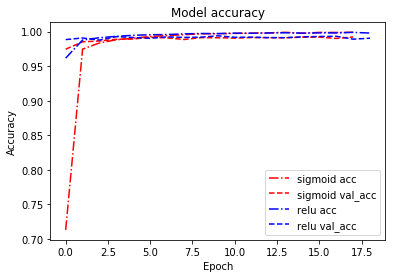

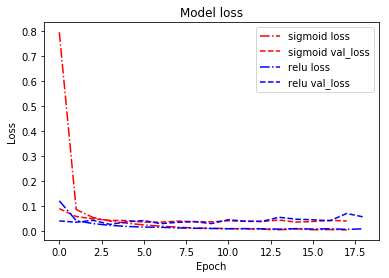

In [11]:
color = ['r', 'b']
label_n = []
for idx, log in enumerate(ac_logger):
    label_n.append(activations[idx]+' acc')
    label_n.append(activations[idx]+' val_acc')
    plt.plot(log.history['acc'], '{}-.'.format(color[idx]))
    plt.plot(log.history['val_acc'], '{}--'.format(color[idx]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(label_n, loc='lower right')
plt.show()

label_n = []
for idx, log in enumerate(ac_logger):
    label_n.append(activations[idx]+' loss')
    label_n.append(activations[idx]+' val_loss')
    plt.plot(log.history['loss'], '{}-.'.format(color[idx]))
    plt.plot(log.history['val_loss'], '{}--'.format(color[idx]))

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(label_n, loc='upper right')
plt.show()

# 結論:
### 結果發現Relu誤差下降速度會比Sigmoid快，但最後收斂時間會較Sigmoid久

# 比較Batch Size大小對訓練時間的差異

In [5]:
activation = 'relu'
bs_logger = []

Batch_Sizes = [32, 64, 128, 256]
print("Batch Size compare:")
print("\tSigmoid vs ReLU\n")
for batch_size in Batch_Sizes:
    print("Batch Size", batch_size)
    model = CNN_model(ac=activation)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    callback = EarlyStopping(monitor='acc', min_delta=0.001, patience=5)
    bs_logger.append(model.fit(x_train, y_train, batch_size=batch_size, epochs=30, validation_split=0.1, callbacks=[callback]))
    eva = model.evaluate(x_test, y_test)
    print("Test accuracy: %.2f loss: %.2f" % (eva[1]*100, eva[0]))
    
    K.clear_session()

Batch Size compare:
	Sigmoid vs ReLU

Batch Size 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2d_5x5_1 (Conv2D)        (None, 28, 28, 32)        832       
_________________________________________________________________
Conv2d_3x3_1 (Conv2D)        (None, 28, 28, 64)        18496     
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 9, 9, 64)          0         
_________________________________________________________________
Conv2d_3x3_2 (Conv2D)        (None, 9, 9, 128)         73856     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 4, 4, 128)         0         
_________________________________________________________________
Conv2d_3x3_3 (Conv2D)        (None, 2, 2, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)     

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 4s 75us/step - loss: 0.1944 - acc: 0.9395 - val_loss: 0.0656 - val_acc: 0.98030s - loss: 0.2144 - acc
Epoch 2/30
54000/54000 [==============================] - 4s 69us/step - loss: 0.0475 - acc: 0.9857 - val_loss: 0.0451 - val_acc: 0.9863
Epoch 3/30
54000/54000 [==============================] - 4s 69us/step - loss: 0.0326 - acc: 0.9903 - val_loss: 0.0386 - val_acc: 0.9882
Epoch 4/30
54000/54000 [==============================] - 4s 69us/step - loss: 0.0235 - acc: 0.9925 - val_loss: 0.0370 - val_acc: 0.9907
Epoch 5/30
54000/54000 [==============================] - 4s 69us/step - loss: 0.0200 - acc: 0.9938 - val_loss: 0.0327 - val_acc: 0.9917
Epoch 6/30
54000/54000 [==============================] - 4s 69us/step - loss: 0.0150 - acc: 0.9949 - val_loss: 0.0329 - val_acc: 0.9905
Epoch 7/30
54000/54000 [==============================] - 4s 69us/step - loss: 0.0133 - acc: 0.9959 - val_

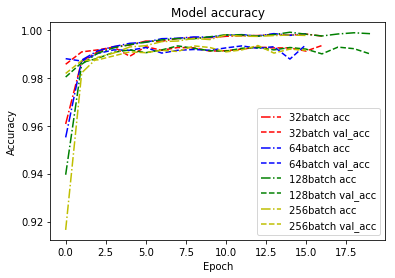

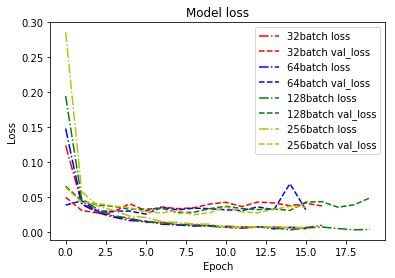

In [10]:
color = ['r', 'b', 'g', 'y']
label_n = []

for idx, log in enumerate(bs_logger):
    label_n.append(str(Batch_Sizes[idx])+'batch acc')
    label_n.append(str(Batch_Sizes[idx])+'batch val_acc')
    plt.plot(log.history['acc'], '{}-.'.format(color[idx]))
    plt.plot(log.history['val_acc'], '{}--'.format(color[idx]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(label_n, loc='lower right')
plt.show()

label_n = []
for idx, log in enumerate(bs_logger):
    label_n.append(str(Batch_Sizes[idx])+'batch loss')
    label_n.append(str(Batch_Sizes[idx])+'batch val_loss')
    plt.plot(log.history['loss'], '{}-.'.format(color[idx]))
    plt.plot(log.history['val_loss'], '{}--'.format(color[idx]))

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(label_n, loc='upper right')
plt.show()

# 結論:
### 在訓練過程中發現Batch Size越大訓練時間會越快，但誤差下降速度會比較慢一些

# 比較Optimizer的差異

In [7]:
from keras.optimizers import SGD, RMSprop, Adam
activation = 'relu'
opt_logger = []

lr = 0.01
sgd = SGD(lr, momentum=0.0)
sgd_momentum  = SGD(lr, momentum=0.05)
rmsprop = RMSprop(lr)
adam = Adam(lr)

# optimizers = [sgd, sgd_momentum, rmsprop, adam]
optimizers = [sgd_momentum, 'sgd', 'rmsprop', 'adam']

print("Optimizer compare:")
for opt in optimizers:
    print("Activation Use", activation)
    model = CNN_model(ac=activation)
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    callback = EarlyStopping(monitor='acc', min_delta=0.001, patience=10)
    opt_logger.append(model.fit(x_train, y_train, epochs=50, validation_split=0.1, callbacks=[callback]))
    eva = model.evaluate(x_test, y_test)
    print("Test accuracy: %.2f loss: %.2f" % (eva[1]*100, eva[0]))
    
    K.clear_session()

Optimizer compare:
Activation Use relu
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2d_5x5_1 (Conv2D)        (None, 28, 28, 32)        832       
_________________________________________________________________
Conv2d_3x3_1 (Conv2D)        (None, 28, 28, 64)        18496     
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 9, 9, 64)          0         
_________________________________________________________________
Conv2d_3x3_2 (Conv2D)        (None, 9, 9, 128)         73856     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 4, 4, 128)         0         
_________________________________________________________________
Conv2d_3x3_3 (Conv2D)        (None, 2, 2, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5

54000/54000 [==============================] - 8s 155us/step - loss: 0.0140 - acc: 0.9968 - val_loss: 0.0501 - val_acc: 0.9940
Epoch 12/50
54000/54000 [==============================] - 8s 154us/step - loss: 0.0137 - acc: 0.9973 - val_loss: 0.0766 - val_acc: 0.9913
Epoch 13/50
54000/54000 [==============================] - 8s 154us/step - loss: 0.0142 - acc: 0.9977 - val_loss: 0.0909 - val_acc: 0.9905
Epoch 14/50
54000/54000 [==============================] - 8s 155us/step - loss: 0.0149 - acc: 0.9974 - val_loss: 0.0719 - val_acc: 0.9928
Epoch 15/50
54000/54000 [==============================] - 8s 155us/step - loss: 0.0168 - acc: 0.9974 - val_loss: 0.0921 - val_acc: 0.99000.0173 - acc:
Epoch 16/50
54000/54000 [==============================] - 8s 155us/step - loss: 0.0166 - acc: 0.9975 - val_loss: 0.0978 - val_acc: 0.9897
Epoch 17/50
54000/54000 [==============================] - 8s 155us/step - loss: 0.0135 - acc: 0.9978 - val_loss: 0.0651 - val_acc: 0.9913
Epoch 18/50
54000/54000 [=

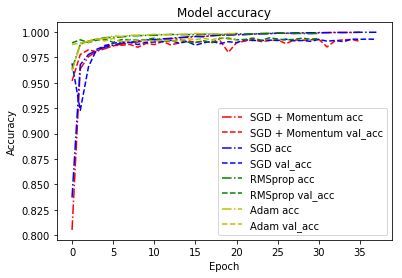

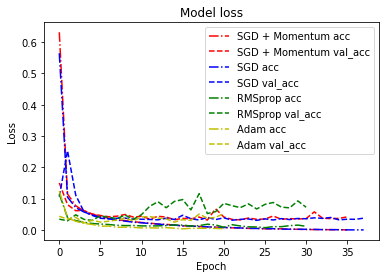

In [9]:
color = ['r', 'b', 'g', 'y']
opt_name = ['SGD + Momentum', 'SGD', 'RMSprop', 'Adam']
label_n = []

for idx, log in enumerate(opt_logger):
    label_n.append(opt_name[idx]+' acc')
    label_n.append(opt_name[idx]+' val_acc')
    plt.plot(log.history['acc'], '{}-.'.format(color[idx]))
    plt.plot(log.history['val_acc'], '{}--'.format(color[idx]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(label_n, loc='lower right')
plt.show()

label_n = []
for idx, log in enumerate(opt_logger):
    label_n.append(opt_name[idx]+' acc')
    label_n.append(opt_name[idx]+' val_acc')
    plt.plot(log.history['loss'], '{}-.'.format(color[idx]))
    plt.plot(log.history['val_loss'], '{}--'.format(color[idx]))

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(label_n, loc='upper right')
plt.show()

# 結論:
### 結果發現SGD雖然收斂速度較緩慢，但能比其他優化器訓練出更好的結果

# 修改原本的模型，讓原本的模型深度更深
# 再使用Dropout的方式降低Over fitting

In [8]:
model = CNN_model('relu')
model.pop()
model.add(Dense(4096, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2d_5x5_1 (Conv2D)        (None, 28, 28, 32)        832       
_________________________________________________________________
Conv2d_3x3_1 (Conv2D)        (None, 28, 28, 64)        18496     
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 9, 9, 64)          0         
_________________________________________________________________
Conv2d_3x3_2 (Conv2D)        (None, 9, 9, 128)         73856     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 4, 4, 128)         0         
_________________________________________________________________
Conv2d_3x3_3 (Conv2D)        (None, 2, 2, 128)         147584    
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
__________

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callback = EarlyStopping(monitor='acc', min_delta=0.001, patience=5)
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[callback])
eva = model.evaluate(x_test, y_test)
print("Test accuracy: %.2f loss: %.2f" % (eva[1]*100, eva[0]))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 18s 375us/step - loss: 0.1712 - acc: 0.9496 - val_loss: 0.1259 - val_acc: 0.9705
Epoch 2/100
48000/48000 [==============================] - 15s 314us/step - loss: 0.0799 - acc: 0.9805 - val_loss: 0.0921 - val_acc: 0.9807
Epoch 3/100
48000/48000 [==============================] - 15s 313us/step - loss: 0.0615 - acc: 0.9848 - val_loss: 0.0586 - val_acc: 0.9861
Epoch 4/100
48000/48000 [==============================] - 15s 313us/step - loss: 0.0507 - acc: 0.9883 - val_loss: 0.0464 - val_acc: 0.9894
Epoch 5/100
48000/48000 [==============================] - 15s 314us/step - loss: 0.0436 - acc: 0.9902 - val_loss: 0.0527 - val_acc: 0.9893
Epoch 6/100
48000/48000 [==============================] - 15s 313us/step - loss: 0.0398 - acc: 0.9901 - val_loss: 0.0738 - val_acc: 0.9841 3s - loss: 0.0407
Epoch 7/100
48000/48000 [==============================] - 15s 314us/step - loss: 0.0365 - a

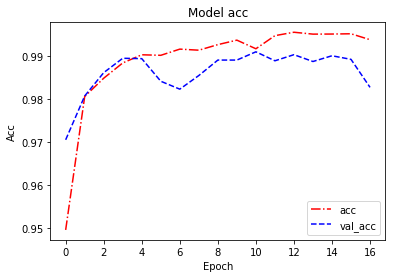

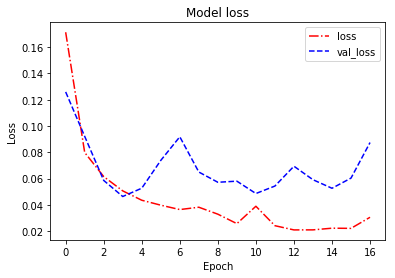

In [14]:
plt.plot(history.history['acc'], 'r-.')
plt.plot(history.history['val_acc'], 'b--')

plt.title('Model acc')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()


plt.plot(history.history['loss'], 'r-.')
plt.plot(history.history['val_loss'], 'b--')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [20]:
K.clear_session()
model = CNN_model('relu')
model.pop()
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2d_5x5_1 (Conv2D)        (None, 28, 28, 32)        832       
_________________________________________________________________
Conv2d_3x3_1 (Conv2D)        (None, 28, 28, 64)        18496     
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 9, 9, 64)          0         
_________________________________________________________________
Conv2d_3x3_2 (Conv2D)        (None, 9, 9, 128)         73856     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 4, 4, 128)         0         
_________________________________________________________________
Conv2d_3x3_3 (Conv2D)        (None, 2, 2, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callback = EarlyStopping(monitor='acc', min_delta=0.001, patience=5)
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[callback])
eva = model.evaluate(x_test, y_test)
print("Test accuracy: %.2f loss: %.2f" % (eva[1]*100, eva[0]))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 16s 341us/step - loss: 0.2499 - acc: 0.9232 - val_loss: 0.0903 - val_acc: 0.9753
Epoch 2/100
48000/48000 [==============================] - 16s 330us/step - loss: 0.1084 - acc: 0.9717 - val_loss: 0.0562 - val_acc: 0.9867
Epoch 3/100
48000/48000 [==============================] - 16s 330us/step - loss: 0.0928 - acc: 0.9781 - val_loss: 0.0465 - val_acc: 0.9900
Epoch 4/100
48000/48000 [==============================] - 16s 330us/step - loss: 0.0809 - acc: 0.9815 - val_loss: 0.0499 - val_acc: 0.9882
Epoch 5/100
48000/48000 [==============================] - 16s 330us/step - loss: 0.0729 - acc: 0.9832 - val_loss: 0.0601 - val_acc: 0.9862
Epoch 6/100
48000/48000 [==============================] - 16s 330us/step - loss: 0.0628 - acc: 0.9849 - val_loss: 0.0504 - val_acc: 0.9899
Epoch 7/100
48000/48000 [==============================] - 16s 329us/step - loss: 0.0589 - acc: 0.9864 - val_l

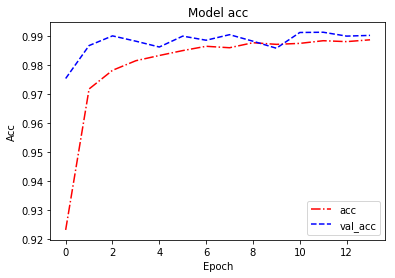

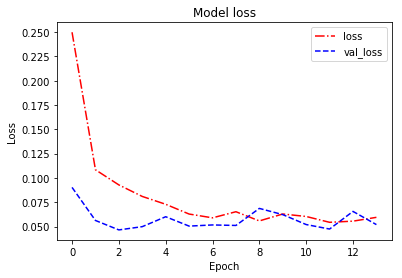

In [22]:
plt.plot(history.history['acc'], 'r-.')
plt.plot(history.history['val_acc'], 'b--')

plt.title('Model acc')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()


plt.plot(history.history['loss'], 'r-.')
plt.plot(history.history['val_loss'], 'b--')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

# 結論:
### 加入Dropout之後確實能夠降低Over fitting的情況發生